In [1]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from LatticeData import *

In [2]:
analyzer = LatticeData(datadir = "/data_test/")

In [3]:
analyzer.copy_data_from_directory("run_7_18_23_stats")

run L_180_beta_1.600000_itheta_0.000000_ntherm_5000_nMC_50000_freq_100 not yet complete: 378 lines
run L_180_beta_1.600000_itheta_2.356194_ntherm_5000_nMC_50000_freq_100 not yet complete: 391 lines
run L_180_beta_1.600000_itheta_3.141593_ntherm_5000_nMC_50000_freq_100 not yet complete: 237 lines
run L_180_beta_1.600000_itheta_1.570796_ntherm_5000_nMC_50000_freq_100 not yet complete: 381 lines
run L_180_beta_1.600000_itheta_0.785398_ntherm_5000_nMC_50000_freq_100 not yet complete: 240 lines


In [4]:
params = analyzer.all_params()

In [5]:
params.head()

,freq,nMC,ntherm,itheta,beta,length
0,100.0,50000.0,5000.0,0.785398,1.6,20.0
1,100.0,50000.0,5000.0,0.000000,1.6,80.0
2,100.0,50000.0,5000.0,0.000000,1.6,20.0
3,100.0,50000.0,5000.0,1.570796,1.6,40.0
4,100.0,50000.0,5000.0,2.356194,1.6,10.0


In [6]:
param_dict = {"length": 10, "freq": 100, "itheta":2.356194, "beta":1.6, "nMC":50000, "ntherm": 5000}
one_run = analyzer.get_data(single_run = True, suppress_output = False, **param_dict)

freq 100
nMC 50000
ntherm 5000
itheta 2.356194
beta 1.6
length 10


In [7]:
one_run.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,dt,...,Q_L_ta,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im
0,0,100.0,0.479179,-183.166830,-184.295868,45.724903,3.675149,8.145972,0.240000,0.0,...,1,3,3,4,8.966957,-3.640801,0.916337,0.890996,0.095738,0.038872
1,100,100.0,0.159302,-195.846927,-196.222275,62.369185,3.675149,8.145972,0.203762,0.0,...,1,3,3,4,10.472580,-4.252121,0.916337,0.890996,0.081974,0.033283
2,200,100.0,0.000000,-199.012224,-199.012224,48.119359,3.675149,8.145972,0.207164,0.0,...,1,3,3,4,9.198745,-3.734913,0.916337,0.890996,0.093325,0.037892
3,300,100.0,0.312655,-179.261053,-179.997729,46.124447,3.675149,8.145972,0.205681,0.0,...,1,3,3,4,9.006048,-3.656673,0.916337,0.890996,0.095322,0.038703
4,400,100.0,0.000000,-210.091869,-210.091869,41.489411,3.675149,8.145972,0.203716,1.0,...,1,3,3,4,8.541562,-3.468081,0.916337,0.890996,0.100506,0.040808


In [8]:
param_dict = {"length": 10, "freq": 100, "itheta":2.356194, "beta":1.6, "nMC":50000}
one_run = analyzer.get_data(single_run = True, suppress_output = False, **param_dict)

Missing parameters in input: 
['ntherm']


In [9]:
param_dict = {"length": 10, "itheta":2.356194}
filtered_data = analyzer.get_data(single_run = False, suppress_output = True, **param_dict)

In [10]:
filtered_data.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,dt,...,Q_L_ta,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im
0,0,100.0,0.479179,-183.166830,-184.295868,45.724903,3.675149,8.145972,0.240000,0.0,...,1,3,3,4,8.966957,-3.640801,0.916337,0.890996,0.095738,0.038872
1,100,100.0,0.159302,-195.846927,-196.222275,62.369185,3.675149,8.145972,0.203762,0.0,...,1,3,3,4,10.472580,-4.252121,0.916337,0.890996,0.081974,0.033283
2,200,100.0,0.000000,-199.012224,-199.012224,48.119359,3.675149,8.145972,0.207164,0.0,...,1,3,3,4,9.198745,-3.734913,0.916337,0.890996,0.093325,0.037892
3,300,100.0,0.312655,-179.261053,-179.997729,46.124447,3.675149,8.145972,0.205681,0.0,...,1,3,3,4,9.006048,-3.656673,0.916337,0.890996,0.095322,0.038703
4,400,100.0,0.000000,-210.091869,-210.091869,41.489411,3.675149,8.145972,0.203716,1.0,...,1,3,3,4,8.541562,-3.468081,0.916337,0.890996,0.100506,0.040808


In [11]:
all_data = analyzer.get_data(single_run = False, suppress_output = True)

In [12]:
df_stats = analyzer.do_stats(stack = False)

In [13]:
df_stats.columns

Index(['length', 'itheta', 'beta', 'nMC', 'ntherm', 'freq', '|phi|_mean',
       'Q_L_mean', 'A_L_mean', 'S_L_mean', 'Xi_L_mean', 'F_LRe_mean',
       'F_LIm_mean', 'acc_mean', 'Q_L_ta', 'A_L_ta', 'S_L_ta', 'Xi_L_ta',
       'corr_length_Re_mean', 'corr_length_Im_mean', 'F_Re_py_mean',
       'F_Im_py_mean', 'mass_gap_Re_mean', 'mass_gap_Im_mean', '|phi|_std',
       'Q_L_std', 'A_L_std', 'S_L_std', 'Xi_L_std', 'F_LRe_std', 'F_LIm_std',
       'acc_std', 'corr_length_Re_std', 'corr_length_Im_std', 'F_Re_py_std',
       'F_Im_py_std', 'mass_gap_Re_std', 'mass_gap_Im_std', 'time (sec)',
       'time (min)', 'time (hr)'],
      dtype='object')

In [14]:
df_stats.head()

,length,itheta,beta,nMC,ntherm,freq,|phi|_mean,Q_L_mean,A_L_mean,S_L_mean,...,acc_std,corr_length_Re_std,corr_length_Im_std,F_Re_py_std,F_Im_py_std,mass_gap_Re_std,mass_gap_Im_std,time (sec),time (min),time (hr)
0,10.0,0.000000,1.6,50000.0,5000.0,100.0,100.0,-0.007607,-206.938237,-206.938237,...,0.001508,2.977838,1.852326,0.0,0.0,0.073337,0.146112,131.0,2.183333,0.036389
1,10.0,0.785398,1.6,50000.0,5000.0,100.0,100.0,0.029954,-207.004950,-207.028475,...,0.001431,2.444997,1.895813,0.0,0.0,0.086243,0.079964,96.0,1.600000,0.026667
2,10.0,1.570796,1.6,50000.0,5000.0,100.0,100.0,0.073667,-206.682882,-206.798597,...,0.001898,2.156220,1.337787,0.0,0.0,0.051491,0.110587,99.0,1.650000,0.027500
3,10.0,2.356194,1.6,50000.0,5000.0,100.0,100.0,0.141681,-206.124743,-206.458571,...,0.001898,2.670526,2.196354,0.0,0.0,0.079131,0.095875,101.0,1.683333,0.028056
4,10.0,3.141593,1.6,50000.0,5000.0,100.0,100.0,0.270681,-203.372231,-204.222600,...,0.000579,2.511189,1.203571,0.0,0.0,0.329912,0.186734,109.0,1.816667,0.030278


In [15]:
#df_stats.info()

In [16]:
#df_stats["length"].unique()

In [17]:
#df_stats = analyzer.do_stats(**{"length":20})
#df_stats.info()

In [18]:
#df_stats["length"].unique()

In [19]:
QL_all = analyzer.get_plot_data(df_stats, obs = "Q_L", beta = 1.6, nMC = 50000, 
                                ntherm = 5000,freq = 100, stack = False)

In [20]:
params.head()

,freq,nMC,ntherm,itheta,beta,length
0,100.0,50000.0,5000.0,0.785398,1.6,20.0
1,100.0,50000.0,5000.0,0.000000,1.6,80.0
2,100.0,50000.0,5000.0,0.000000,1.6,20.0
3,100.0,50000.0,5000.0,1.570796,1.6,40.0
4,100.0,50000.0,5000.0,2.356194,1.6,10.0


In [21]:
QL_all

(0    0.000000
 1    0.785398
 2    1.570796
 3    2.356194
 4    3.141593
 Name: itheta, dtype: float64,
 0   -0.007607
 1    0.029954
 2    0.073667
 3    0.141681
 4    0.270681
 Name: Q_L_mean, dtype: float64,
 0    0.086523
 1    0.098393
 2    0.116710
 3    0.145105
 4    0.211172
 Name: Q_L_std, dtype: float64)

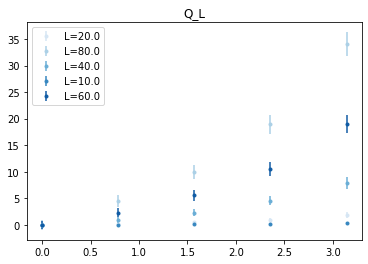

In [25]:
df_stats = analyzer.do_stats(stack = False)
params = analyzer.all_params()
lengths = params["length"].unique()
colors = sns.color_palette("Blues", len(lengths))
observable = "Q_L"

for n,length in enumerate(lengths):
    x,y,err = analyzer.get_plot_data(df_stats, obs = observable, L = length, beta = 1.6, nMC = 50000, 
                                     ntherm = 5000, freq = 100)
    plt.errorbar(x, y , yerr = err, marker = ".", ls = "none", color = colors[n], label ="L="+str(length))
plt.legend()
plt.title(observable)
plt.savefig("../Figs_README/QL_v_itheta_example.jpg", format = "jpg")
plt.show()

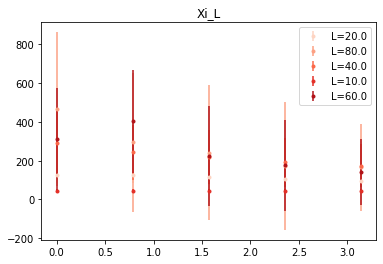

In [26]:
colors = sns.color_palette("Reds", len(lengths))
observable = "Xi_L"

for n,length in enumerate(lengths):
    x,y,err = analyzer.get_plot_data(df_stats, obs = observable, L = length, beta = 1.6, nMC = 50000, 
                                     ntherm = 5000, freq = 100)
    plt.errorbar(x, y , yerr = err, marker = ".", ls = "none", color = colors[n], label ="L="+str(length))
plt.legend()
plt.title(observable)
plt.savefig("../Figs_README/XiL_v_itheta_example.jpg", format = "jpg")
plt.show()